In [35]:
from IPython.display import HTML

In [36]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [16]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

Populating the interactive namespace from numpy and matplotlib


/Users/haonan/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [18]:
%%R
library(lme4)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)

# Part 1: Rating task

In [3]:
data_rating = pd.read_csv('exp_rating.csv')
#data_rating.head()

## Correlation plot

Text(0.5, 1.0, 'Correlations between familiarity, liking, and confidence of liking')

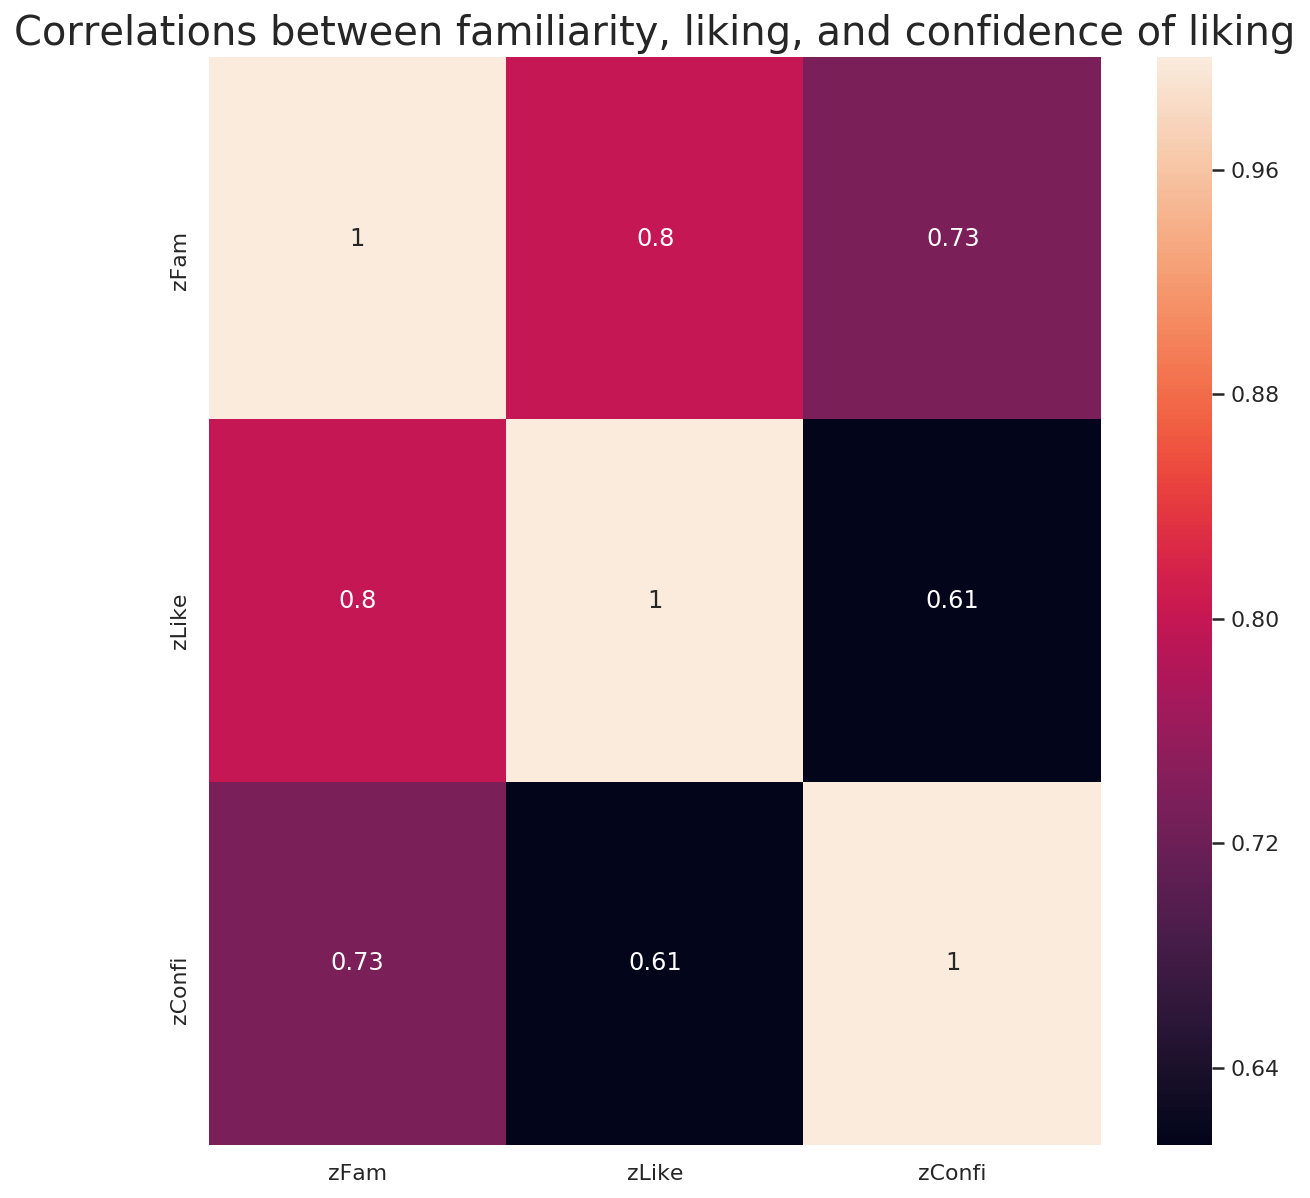

In [12]:

dataColsSelected = data_rating.loc[:,  ['zFam', 'zLike', 'zConfi']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(data_corr, 
       xticklabels=data_corr.columns,
       yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations between familiarity, liking, and confidence of liking',fontsize=20)
#sns.set(font_scale=0.8)

In [4]:
x_variable = 'zFam'
x_varlabel = 'Familiarity'
y_variable = 'zLike'
y_varlabel =  'Liking'

Pearson's r = 0.799 p =  0.0


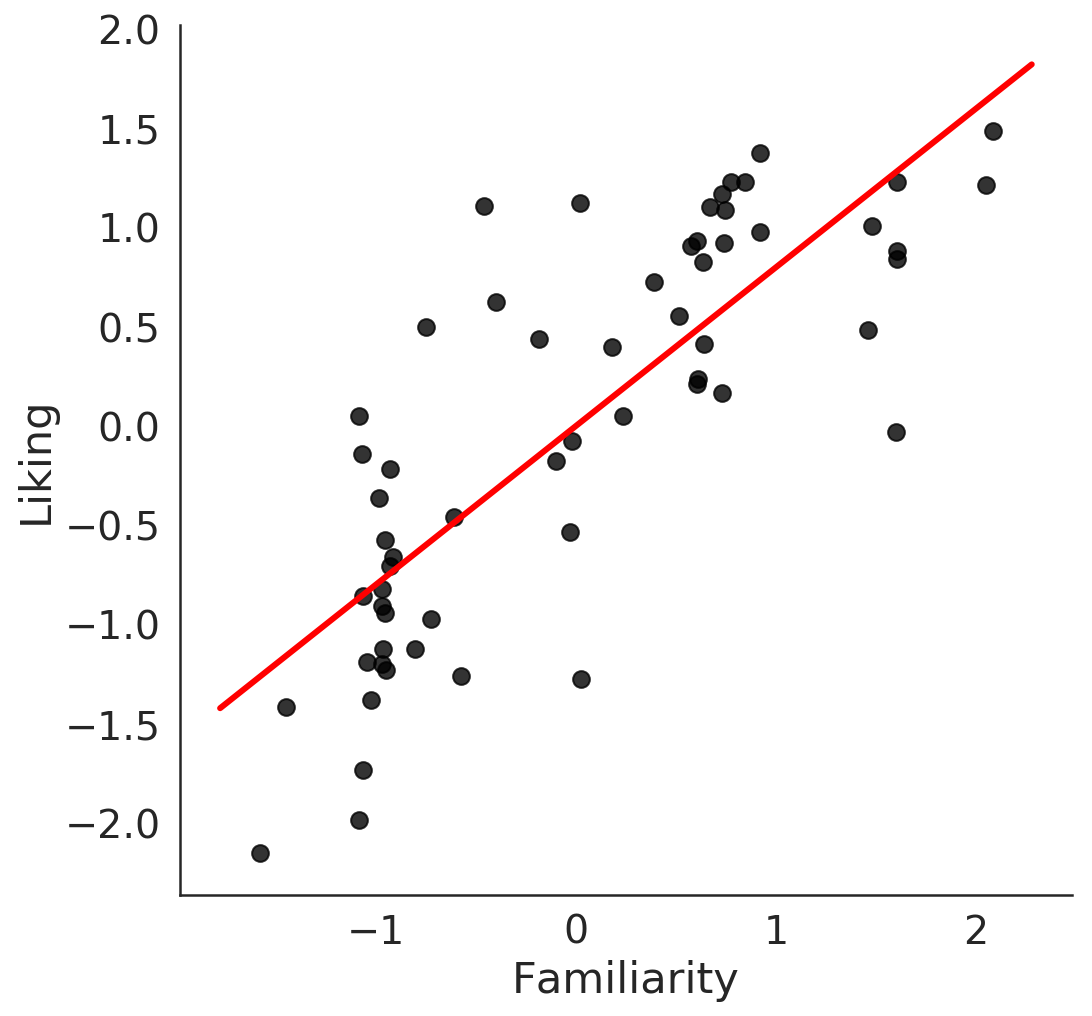

In [7]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_rating, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_rating[x_variable]
y=data_rating[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_rating[x_variable], data_rating[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

*    <font size="4">From the plot, familiarity, liking and confidence of liking ratings have a high positive correlation. It means if a fruit is consummed by the participant a lot (How often do you eat this fruit?), the participant will value this fruit highly and report high confidence of the liking. <font>

# Part 2: preference task

In [7]:
data_trans = pd.read_csv('exp_trans.csv')
#list(data_trans)
%R -i data_trans


## Correlation plots

Text(0.5, 1.0, 'Correlations in preference task')

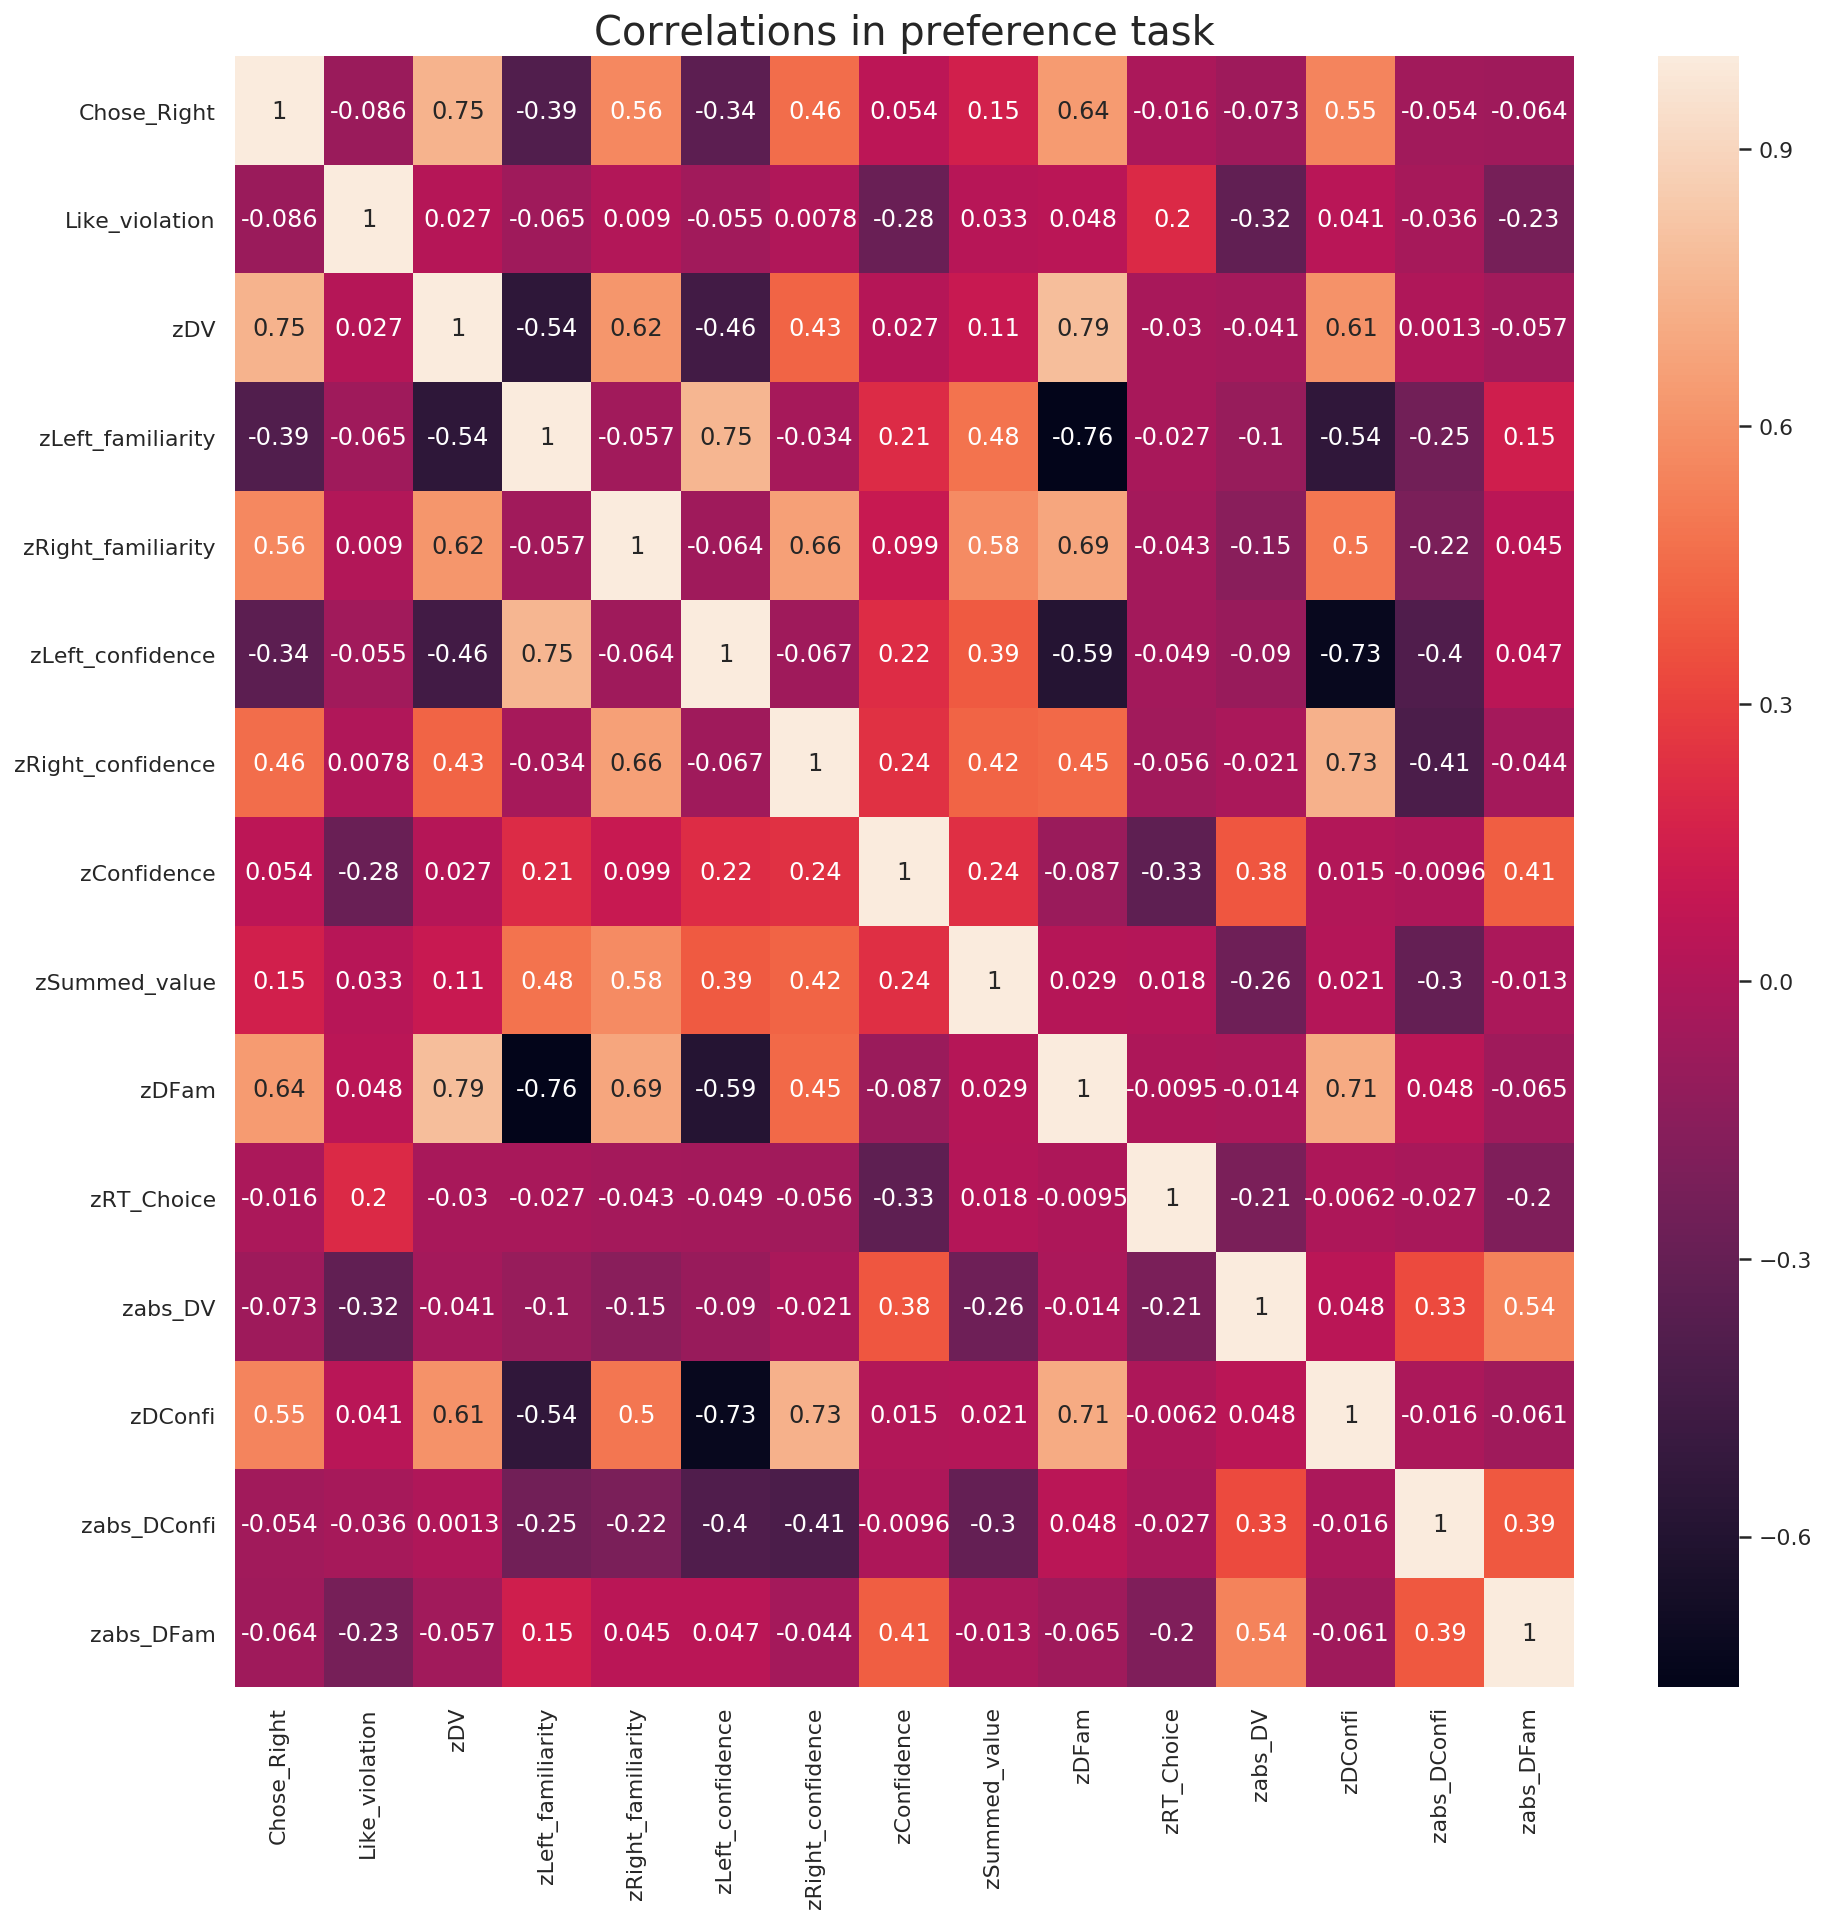

In [114]:
dataColsSelected = data_trans.loc[:,  ['Chose_Right','Like_violation', 'zDV', 'zLeft_familiarity', 'zRight_familiarity', 'zLeft_confidence', 'zRight_confidence', 'zConfidence', 'zSummed_value', 'zDFam', 'zRT_Choice', 'zabs_DV', 'zDConfi', 'zabs_DConfi', 'zabs_DFam']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations in preference task',fontsize=20)

<font size = '4'> The significance of correlation between DFam and Chose Right<font>

In [20]:
x_variable = 'zDFam'
x_varlabel = 'Difference in Familiarity'
y_variable = 'Chose_Right'
y_varlabel =  'Chose Right'

Pearson's r = 0.642 p =  0.0


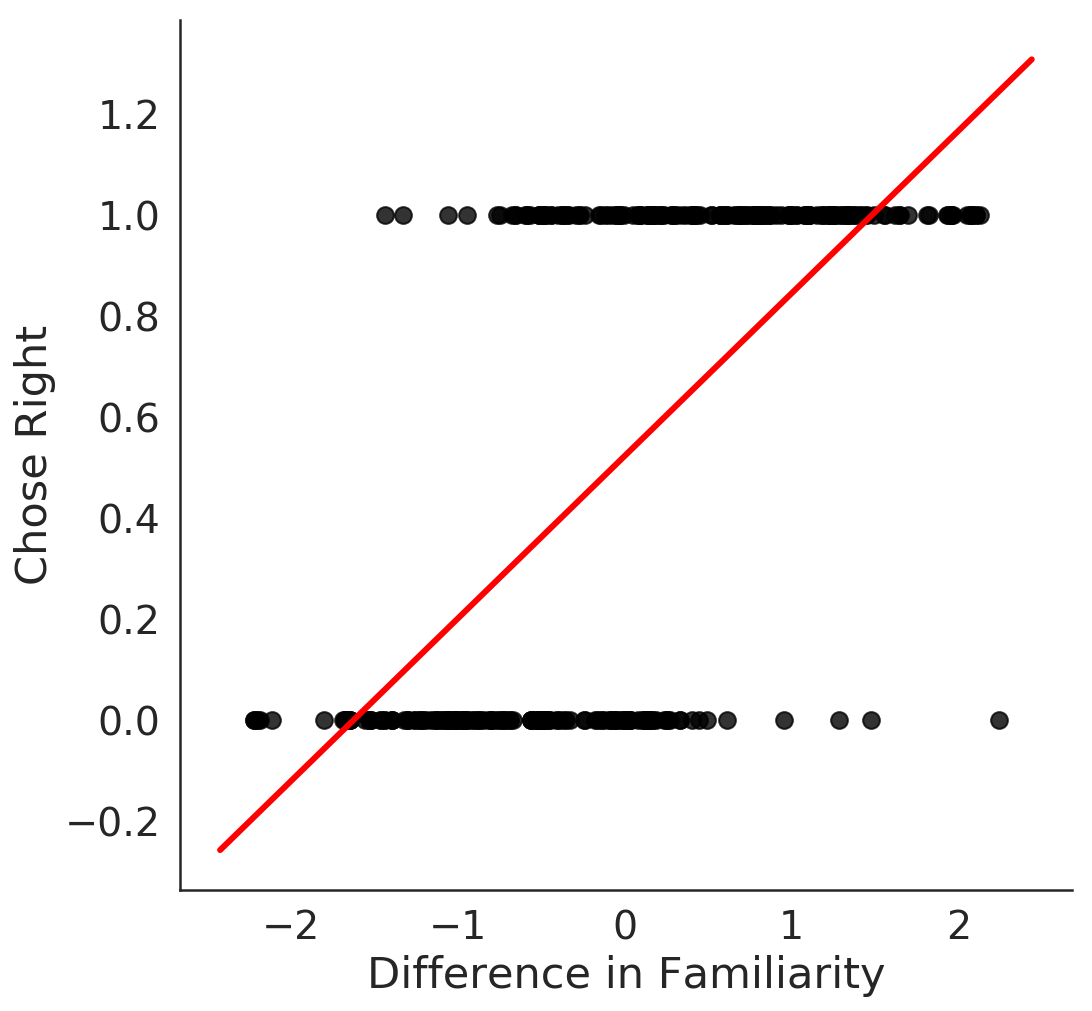

In [21]:
f = plt.figure(figsize=(8, 8))
sns.set(style='white', font_scale=1.8)
ax = sns.regplot(data=data_trans, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
#sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
#exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
#exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
#plt.legend(handles=[exp1, exp2], loc=3)
x=data_trans[x_variable]
y=data_trans[y_variable]
fit = np.polyfit(x, y, deg=1)
future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
fit_fn = np.poly1d(fit)
future_fit = np.polyval(fit_fn, future)
ax.plot(future, future_fit, color='Red', lw=3)
sns.despine()

results = pearsonr(data_trans[x_variable], data_trans[y_variable])
print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))

<font size = '5'> **Confidence modulation of |DV| on choosing the right item** <font>

/Users/haonan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/haonan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Low measure:logit coef = [[2.91634716]] ; Intercept:  [0.03113937]
high measure:logit coef = [[6.9319223]] ; Intercept:  [0.45659419]


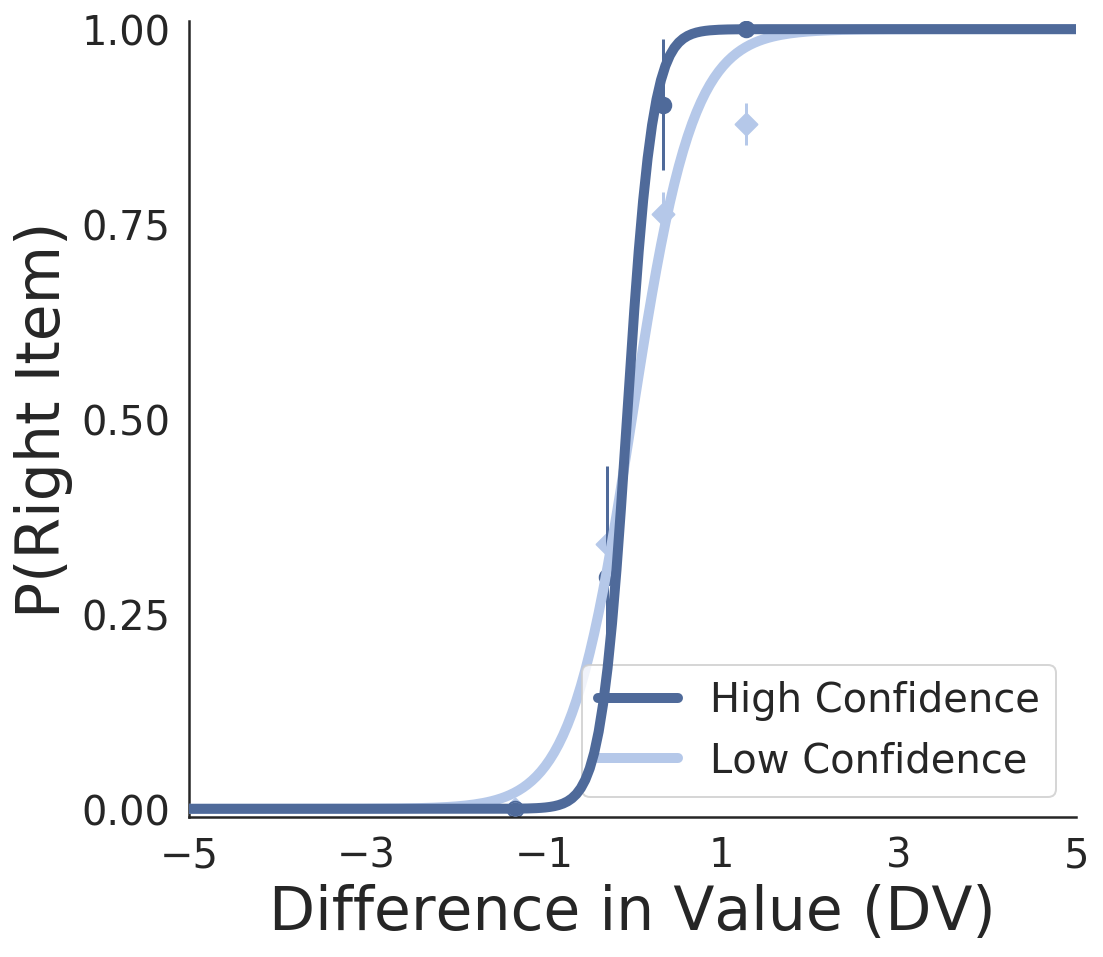

In [40]:
logisticplot_all('zConfidence_dich', 'High Confidence', 'Low Confidence', data=data_trans, xaxis='zDV', yaxis='Chose_Right', ylab='P(Right Item)', xlab='Difference in Value (DV)',
                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Participant')
plt.tight_layout()

<font size = '4'> Low confidence is associated with more preference violations (%) <font>

In [19]:
%%R
proportions = prop.table(table(data_trans$Like_violation, data_trans$zConfidence_dich), 1)
rownames(proportions) = c('Transitive Trials', 'Preference Violations')
colnames(proportions) = c('Low Confidence', 'High Confidence')
round(proportions*100, 2)

                       
                        Low Confidence High Confidence
  Transitive Trials              45.77           54.23
  Preference Violations          82.50           17.50


## Regression Analysis
<font size = '5'> Predictors of choosing the right item <font>

In [115]:
#data_trans = data_trans.drop('DVBin2', axis = 1)
%R -i data_trans

In [24]:
%%R
model_choice = glm(Chose_Right ~ zDV + zDFam + zDConfi + zConfidence + zDV:zConfidence +zSummed_value + zDV:zSummed_value, data=data_trans, family=binomial(link="logit"))
fix_1a <- coef(model_choice)
fix_se_1a <- sqrt(diag(vcov(model_choice)))
names_1a <- names(fix_1a)
summary(model_choice)


Call:
glm(formula = Chose_Right ~ zDV + zDFam + zDConfi + zConfidence + 
    zDV:zConfidence + zSummed_value + zDV:zSummed_value, family = binomial(link = "logit"), 
    data = data_trans)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48155  -0.12423   0.00068   0.29649   2.36992  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.2910     0.2424   1.200 0.230088    
zDV                 4.6552     0.7606   6.121 9.33e-10 ***
zDFam               0.8237     0.4047   2.035 0.041832 *  
zDConfi             0.7005     0.3167   2.212 0.026993 *  
zConfidence         0.3405     0.2199   1.549 0.121444    
zSummed_value       0.1262     0.1751   0.721 0.471141    
zDV:zConfidence     2.2518     0.6129   3.674 0.000239 ***
zDV:zSummed_value  -0.9334     0.5832  -1.601 0.109461    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null devia

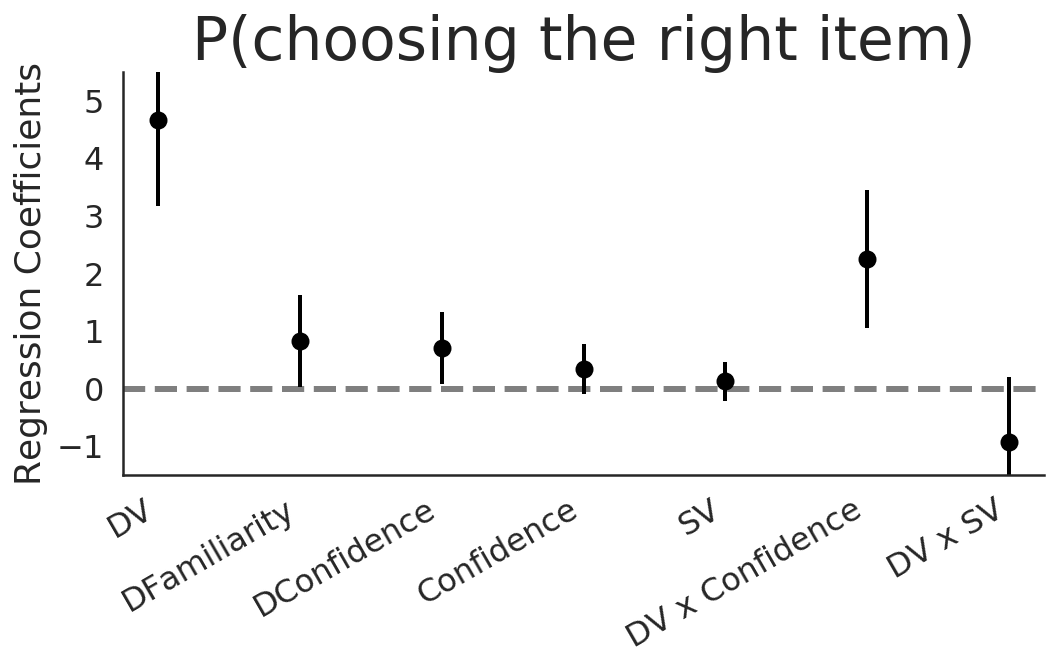

In [30]:
%R -o fix_1a -o fix_se_1a -o names_1a
choice_table_exp1 = regtable(fix_1a, fix_se_1a, names_1a)
choice_table_exp1
cols = ['(Intercept)', 'zDV', 'zDFam', 'zDConfi', 'zConfidence', 'zSummed_value', 'zDV:zConfidence', 'zDV:zSummed_value']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['Intercept', 'DV', 'DFamiliarity', 
                             'DConfidence', 'Confidence', 'SV', 'DV x Confidence', 'DV x SV']
Coefpresplot(choice_table_exp1, title='P(choosing the right item)', ticklabsize=16, size='narrow',
             ylimits=(-1.5, 5.5), ymultiple=1, n_ET_predictors=1)

*  <font size = '4'> As the analysis shows, DV(right item - left item), DFamiliarity (right item - left item), DConfidence (right item - left item), and interaction between DV and confidence are the significant positive predictors of choosing the right option. <font>

<font size = '5'> Predictors of preference violation <font>

In [31]:
%%R
model_viol = glm(Like_violation ~ zabs_DV + zConfidence + zRT_Choice + zabs_DV:zConfidence + zabs_DConfi + zabs_DFam, data=data_trans, family=binomial(link="logit"))
fix_1b <- coef(model_viol)
fix_se_1b <- sqrt(diag(vcov(model_viol)))
names_1b <- names(fix_1b)
summary(model_viol)


Call:
glm(formula = Like_violation ~ zabs_DV + zConfidence + zRT_Choice + 
    zabs_DV:zConfidence + zabs_DConfi + zabs_DFam, family = binomial(link = "logit"), 
    data = data_trans)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.27554  -0.49270  -0.10331  -0.00683   2.40352  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -4.5777     0.7815  -5.857 4.71e-09 ***
zabs_DV              -3.0386     0.7255  -4.188 2.81e-05 ***
zConfidence          -1.7504     0.5200  -3.366 0.000763 ***
zRT_Choice            0.2778     0.1496   1.857 0.063318 .  
zabs_DConfi           0.5297     0.2299   2.304 0.021221 *  
zabs_DFam            -0.2583     0.2858  -0.904 0.366099    
zabs_DV:zConfidence  -1.4120     0.4980  -2.835 0.004576 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 250.92  on 358  degrees of freedom
Residua

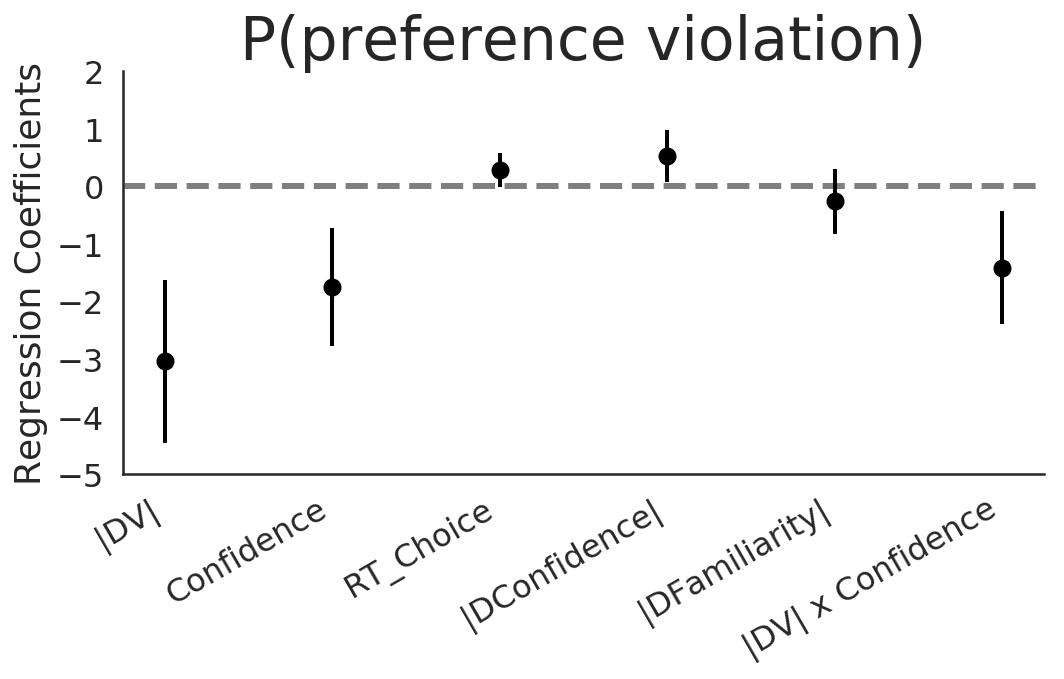

In [32]:
%R -o fix_1b -o fix_se_1b -o names_1b
choice_table_exp1 = regtable(fix_1b, fix_se_1b, names_1b)
choice_table_exp1
cols = ['(Intercept)', 'zabs_DV', 'zConfidence', 'zRT_Choice', 'zabs_DConfi', 'zabs_DFam', 'zabs_DV:zConfidence']
choice_table_exp1 = choice_table_exp1[cols]
choice_table_exp1.columns = ['Intercept', '|DV|', 'Confidence', 
                             'RT_Choice', '|DConfidence|', '|DFamiliarity|', '|DV| x Confidence']
Coefpresplot(choice_table_exp1, title='P(preference violation)', ticklabsize=16, size='narrow',
             ylimits=(-5, 2), ymultiple=1, n_ET_predictors=0)

<font size = '4'>*    A preference violation is considered when participants select the lower valued fruit in the preference task. The values of fruits are derived from liking ratings in the rating task. The violated trials are encoded as "1", while non-violated trials are encoded as "0". <font>


<font size = '4'>*    Participants made fewer violations when the absolute difference in value of two fruits are higher, or when participants are confident about their choice. Preference violation was increased when there was a larger difference of confidence in liking rating of two options, but the effect was small. <font>


# Part2: Associative Inference test

In [33]:
data_infer = pd.read_csv('exp_infer.csv')
#list(data_infer)

<font size = '5'> **Correlation plot** <font>

Text(0.5, 1.0, 'Correlations in associative inference task')

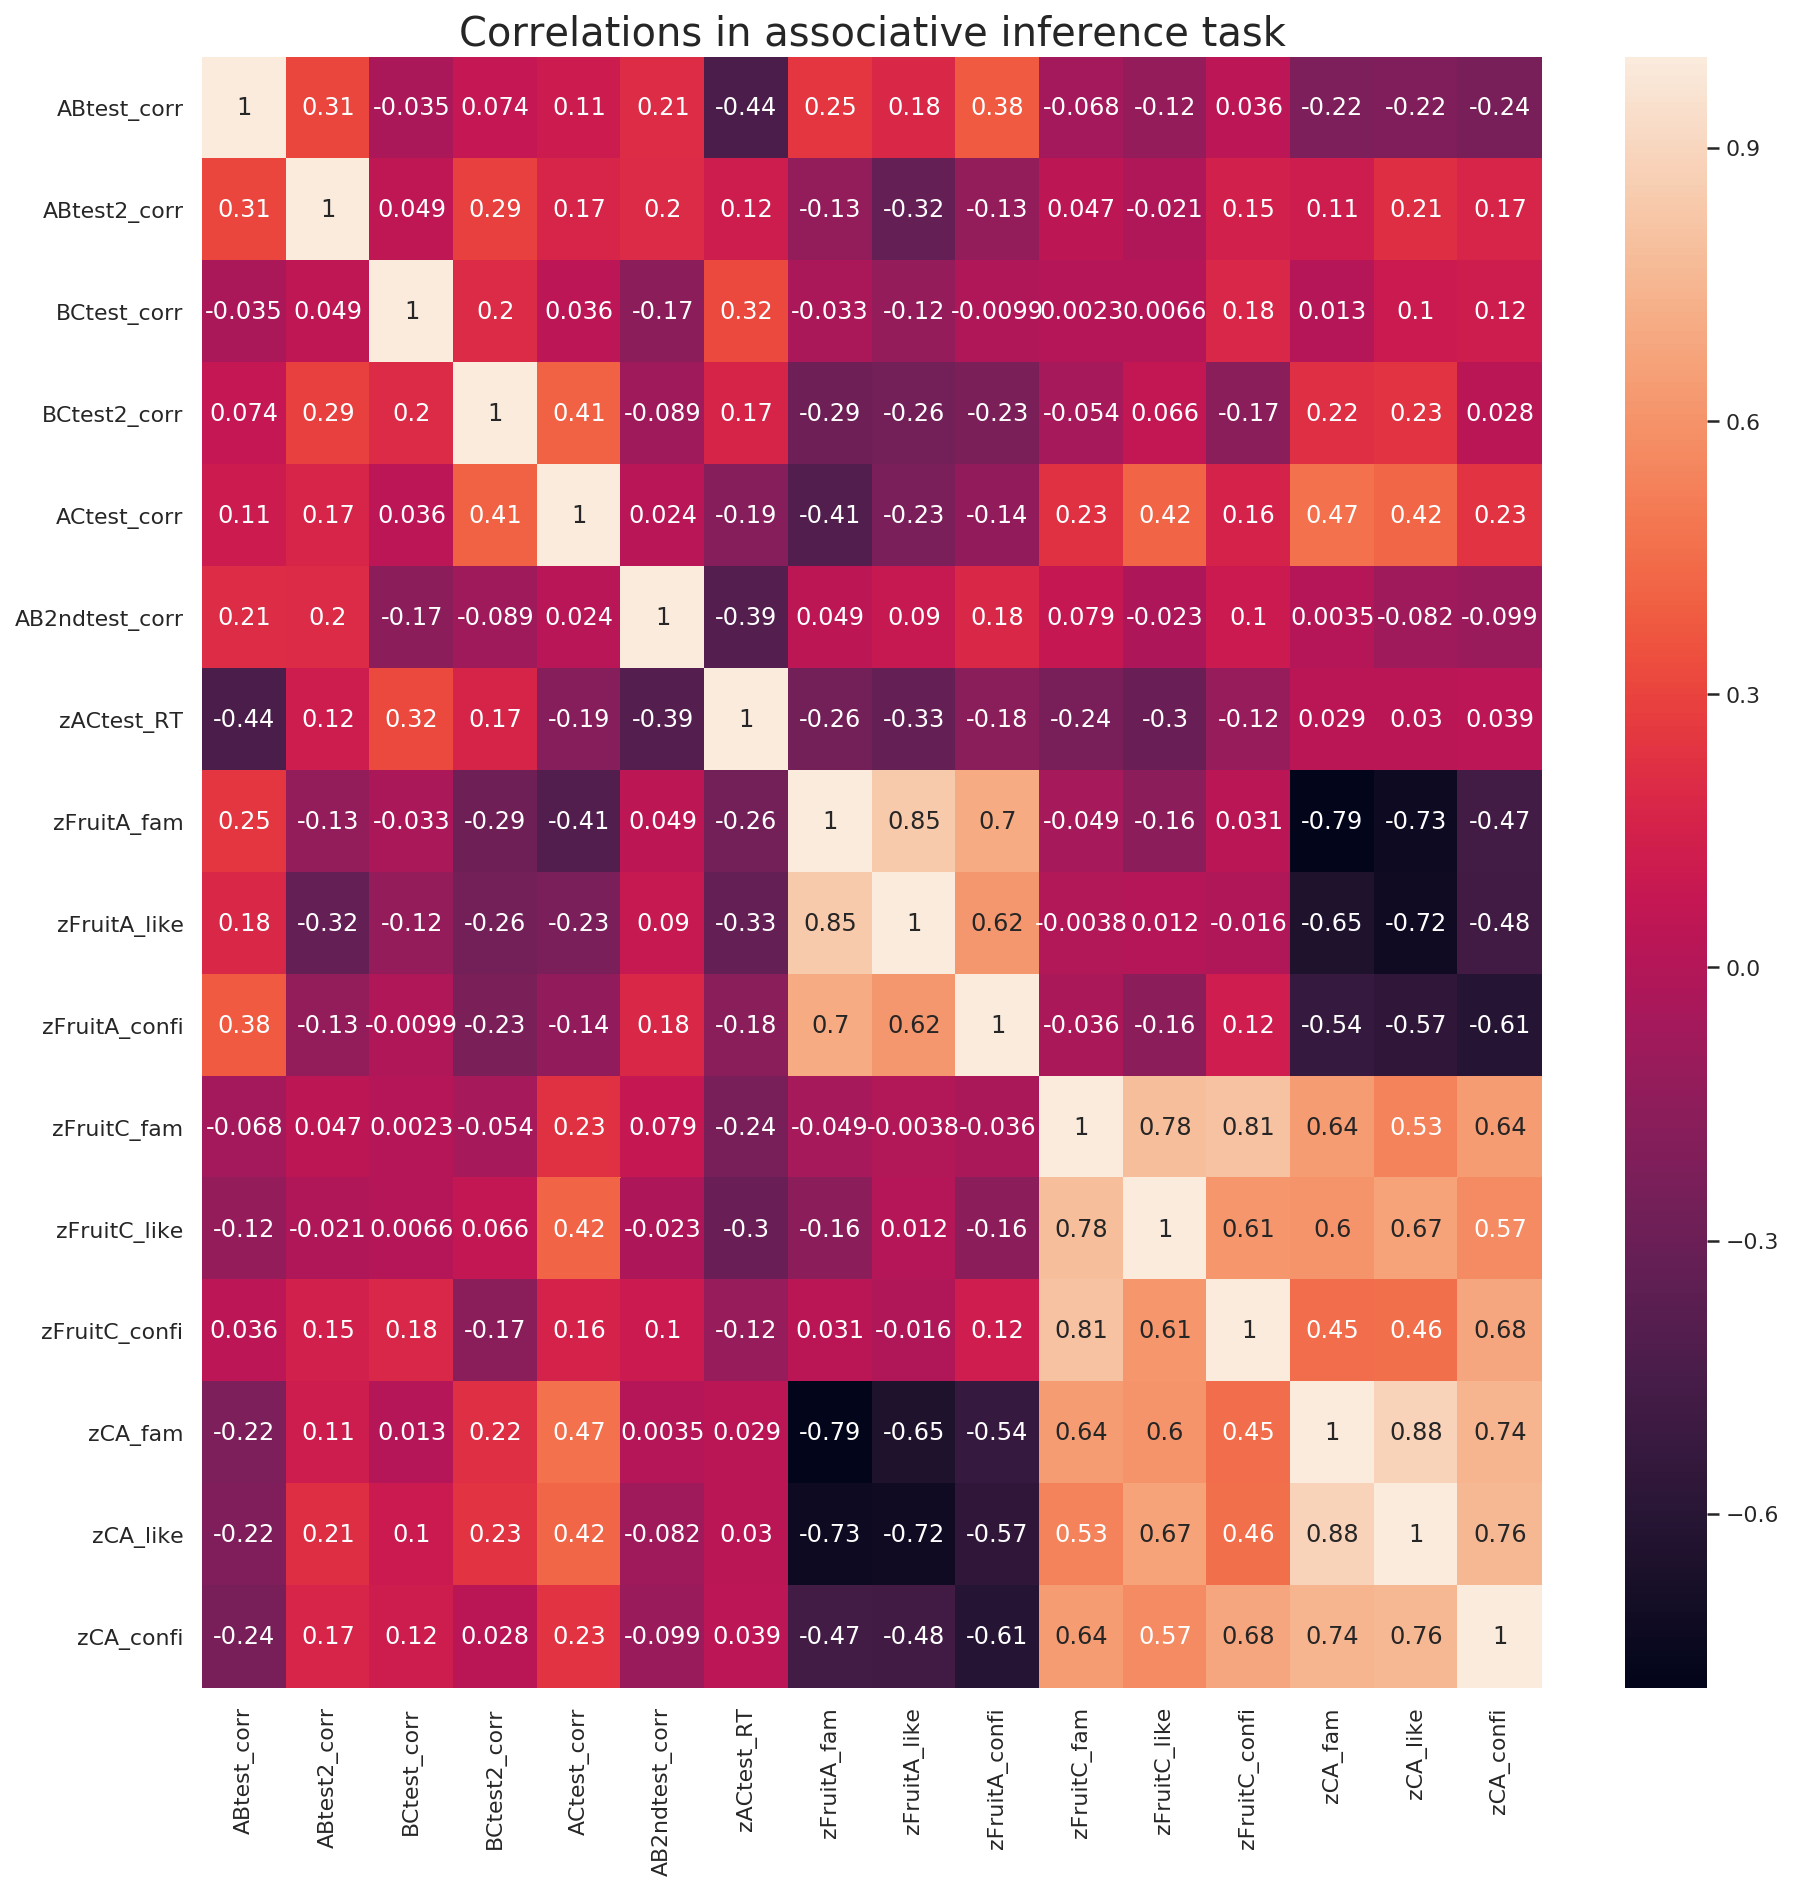

In [225]:
dataColsSelected = data_infer.loc[:,  ['ABtest_corr','ABtest2_corr', 'BCtest_corr', 'BCtest2_corr', 'ACtest_corr', 'AB2ndtest_corr', 'zACtest_RT', 'zFruitA_fam', 'zFruitA_like', 'zFruitA_confi', 'zFruitC_fam', 'zFruitC_like', 'zFruitC_confi', 'zCA_fam', 'zCA_like','zCA_confi']]
dataColsSelected
data_corr = dataColsSelected.corr(method='pearson')
data_corr
# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(data_corr, 
    xticklabels=data_corr.columns,
     yticklabels=data_corr.columns, annot=True, annot_kws={"size": 12})

ax.set_title('Correlations in associative inference task',fontsize=20)

<font size = '5'> **Test of Dependence  on Direct Association in Associative Inference** <font>

In [208]:
%R -i data_infer

In [197]:
%%R
AC.data <- data.frame(data_infer$BCtest2_corr, data_infer$ACtest_corr)

# Create a table with the needed variables.
AC.data = table(data_infer$BCtest2_corr, data_infer$ACtest_corr) 

names(dimnames(AC.data)) = c('BCtest2', '     ACtest')
rownames(AC.data) = c('wrong', 'correct')
colnames(AC.data) = c('wrong', 'correct')
print(AC.data)
print(chisq.test(AC.data))

              ACtest
BCtest2   wrong correct
  wrong       2       0
  correct     7      21

	Pearson's Chi-squared test with Yates' continuity correction

data:  AC.data
X-squared = 2.0663, df = 1, p-value = 0.1506



<font size = '4'>*  The performance of indirect associative inference (ACtest) should be based on the performance of direct association (ABtest and BCtest). I used the chi-squared test to examine whether there's dependence on BCtest2 in ACtest performance. However, the insufficient sample size prevents from reaching the conclusion. <font>


<font size = '4'>*  Also, the number of observations in cell (wrong, wrong) and (wrong,correct) is insufficient for the chi-squared test. I will increase the difficulty (the number of fruit) in the next pilot study. <font>

<font size = '5'> **Predictors of Associative Inference Performance** <font>

In [235]:
%%R
model_AC1 = glm(ACtest_corr ~  zFruitA_fam, data=data_infer, family=binomial(link="logit"))
summary(model_AC1)


Call:
glm(formula = ACtest_corr ~ zFruitA_fam, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0496  -0.9631   0.5392   0.8031   1.3385  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   1.0111     0.4616   2.191   0.0285 *
zFruitA_fam  -1.0078     0.4800  -2.099   0.0358 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 31.490  on 28  degrees of freedom
AIC: 35.49

Number of Fisher Scoring iterations: 4



In [236]:
%%R
model_AC2 = glm(ACtest_corr ~  zFruitC_like, data=data_infer, family=binomial(link="logit"))
summary(model_AC2)


Call:
glm(formula = ACtest_corr ~ zFruitC_like, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0386  -0.7248   0.5103   0.7615   1.2786  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)    1.0240     0.4642   2.206   0.0274 *
zFruitC_like   1.0924     0.5238   2.086   0.0370 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 31.119  on 28  degrees of freedom
AIC: 35.119

Number of Fisher Scoring iterations: 4



In [237]:
%%R
model_AC3 = glm(ACtest_corr ~  zFruitA_fam + zFruitC_like, data=data_infer, family=binomial(link="logit"))
summary(model_AC3)


Call:
glm(formula = ACtest_corr ~ zFruitA_fam + zFruitC_like, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3191  -0.5567   0.4360   0.7470   1.4763  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept)    1.1009     0.4999   2.202   0.0276 *
zFruitA_fam   -0.9242     0.5051  -1.830   0.0673 .
zFruitC_like   1.0324     0.5664   1.823   0.0683 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 27.270  on 27  degrees of freedom
AIC: 33.27

Number of Fisher Scoring iterations: 4



<font size = '4'>*  The familiarity of fruit A and the liking of fruit C are significant predictors of associative inference performance (ACtest_corr) when they are added seperately, but the significance disappears in the combined model. Maybe more data can solve this problem. <font>

In [241]:
%%R
model_AC2 = glm(ACtest_corr ~ zCA_fam + zCA_like, data=data_infer, family=binomial(link="logit"))
summary(model_AC2)


Call:
glm(formula = ACtest_corr ~ zCA_fam + zCA_like, family = binomial(link = "logit"), 
    data = data_infer)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2261  -0.7551   0.4419   0.7503   1.6425  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   1.0727     0.4849   2.212    0.027 *
zCA_fam       1.0611     1.0070   1.054    0.292  
zCA_like      0.1930     1.0114   0.191    0.849  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 36.652  on 29  degrees of freedom
Residual deviance: 29.719  on 27  degrees of freedom
AIC: 35.719

Number of Fisher Scoring iterations: 4



<font size = '4'>*    I have tried the difference between fruitC and fruitA in familiarity, liking or confidence, but similar results are found. <font>

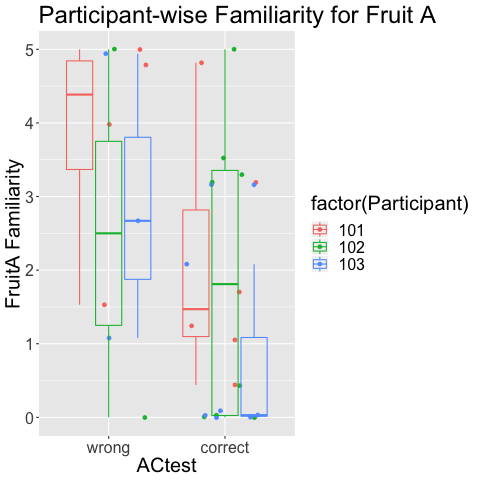

In [245]:
%%R
ggplot(data_infer, aes(factor(ACtest_corr, labels=c("wrong","correct")), FruitA_fam, color = factor(Participant))) +
    geom_jitter() + stat_boxplot(fill = NA) + labs(title = "Participant-wise Familiarity for Fruit A") + xlab("ACtest") + ylab("FruitA Familiarity") + theme(text = element_text(size=20))

# Part 3: Group level analysis
<font size = '4'>**Hypothesis:** Having high preference violation score would decrease indirect association score (AC test), but it would have less effect on direct association score (AB and BC tests). <font>

In [34]:
%%R
exp_infer_group <- read.csv(file = "exp_infer_group.csv", header=TRUE, sep=",")
#head(exp_infer_group)

In [248]:
%%R
exp_infer_group_long <- melt(exp_infer_group, id = c("Like_violation", "Participant", "ABtest_corr", "BCtest_corr"))
#head(exp_infer_group_long)

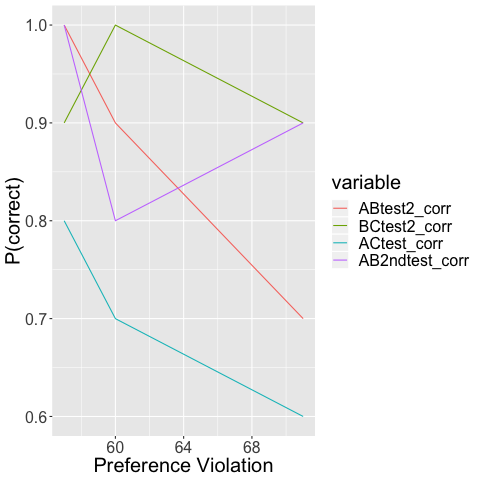

In [249]:
%%R
ggplot(exp_infer_group_long, aes(x=Like_violation, y=value, color = variable)) +
       geom_line () +
       ylab("P(correct)") + 
       xlab("Preference Violation") +
       theme(text = element_text(size=20))

*   <font size = '4'>It seems people with more preference violation also did badly at AC test. But more people should be tested to draw the conclusion.
*   Ceiling effect is observed in direct association tests. More items can be introduced to reduce the ceiling effect. <font>

# Appendix

<span style="font-size:1.5em;">Dichotomize variables</span>

In [ ]:
%%R
library(sjmisc)

In [ ]:
%%R
data_trans <- read.csv(file = "exp_trans.csv", header=TRUE, sep=",")
data_trans <- dicho(data_trans, zConfidence, suffix = "_dich")
write.csv(data_trans, file = 'test_to_see.csv', row.names = FALSE)

<span style="font-size:1.5em;">Define Functions</span>

In [26]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

In [27]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

**for regression coefficient plots**

In [28]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [29]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=30)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#000000'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [9]:
%%R
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /System/Library/Frameworks/Accelerate.framework/Versions/A/Frameworks/vecLib.framework/Versions/A/libBLAS.dylib
LAPACK: /Users/haonan/anaconda3/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] reshape2_1.4.3   dplyr_0.8.0.1    broom_0.5.0      MASS_7.3-51.4   
[5] ggplot2_3.1.1    optimx_2018-7.10 lme4_1.1-21      Matrix_1.2-17   

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1        pillar_1.3.1      compiler_3.5.1    nloptr_1.2.1     
 [5] plyr_1.8.4        boot_1.3-22       tibble_2.1.1      nlme_3.1-137     
 [9] gtable_0.3.0      lattice_0.20-35   pkgconfig_2.0.2   rlang_0.3.4      
[13] withr_2.1.2       stringr_1.3.1     grid_3.5.1